check the status of NVIDIA GPUs on a system

In [1]:
# check the status of NVIDIA GPUs on a system
!nvidia-smi

Mon Sep 25 05:08:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Import the Libraries

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Installation of Ultralytics and Roboflow
Training a deep learning model involves feeding it data and adjusting its parameters so that it can make accurate predictions. Train mode in Ultralytics YOLOv8 is engineered for effective and efficient training of object detection models, fully utilizing modern hardware capabilities. This guide aims to cover all the details you need to get started with training your own models using YOLOv8's robust set of features.raining a deep learning model involves feeding it data and adjusting its parameters so that it can make accurate predictions. Train mode in Ultralytics YOLOv8 is engineered for effective and efficient training of object detection models, fully utilizing modern hardware capabilities. This guide aims to cover all the details you need to get started with training your own models using YOLOv8's robust set of features.

Roboflow is a platform designed to streamline the process of managing, annotating, and preparing image datasets for machine learning projects, especially those related to computer vision. It offers a variety of tools and features for dataset preprocessing, augmentation, and organization.

In [3]:
!pip install ultralytics==8.0.134

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.1/629.1 kB 8.3 MB/s eta 0:00:00


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="snsJF3dN4IRCsZ481cGc")
project = rf.workspace("tutorial-h6lip").project("sports-vision")
dataset = project.version(1).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled 

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Sports-Vision-1 in yolov8:: 100%|██████████| 184/184 [00:00<00:00, 7229.39it/s]


In [5]:
# import libraries
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
# command for yolo

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=5 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 52.5MB/s]
New https://pypi.org/project/ultralytics/8.0.186 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Sports-Vision-1/data.yaml, epochs=5, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False

In [7]:
# List the contents of the 'runs/detect/train/' directory
!ls runs/detect/train/

args.yaml					    R_curve.png
confusion_matrix_normalized.png			    results.csv
confusion_matrix.png				    results.png
events.out.tfevents.1695618725.c06830496ada.1972.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
labels_correlogram.jpg				    train_batch2.jpg
labels.jpg					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    weights


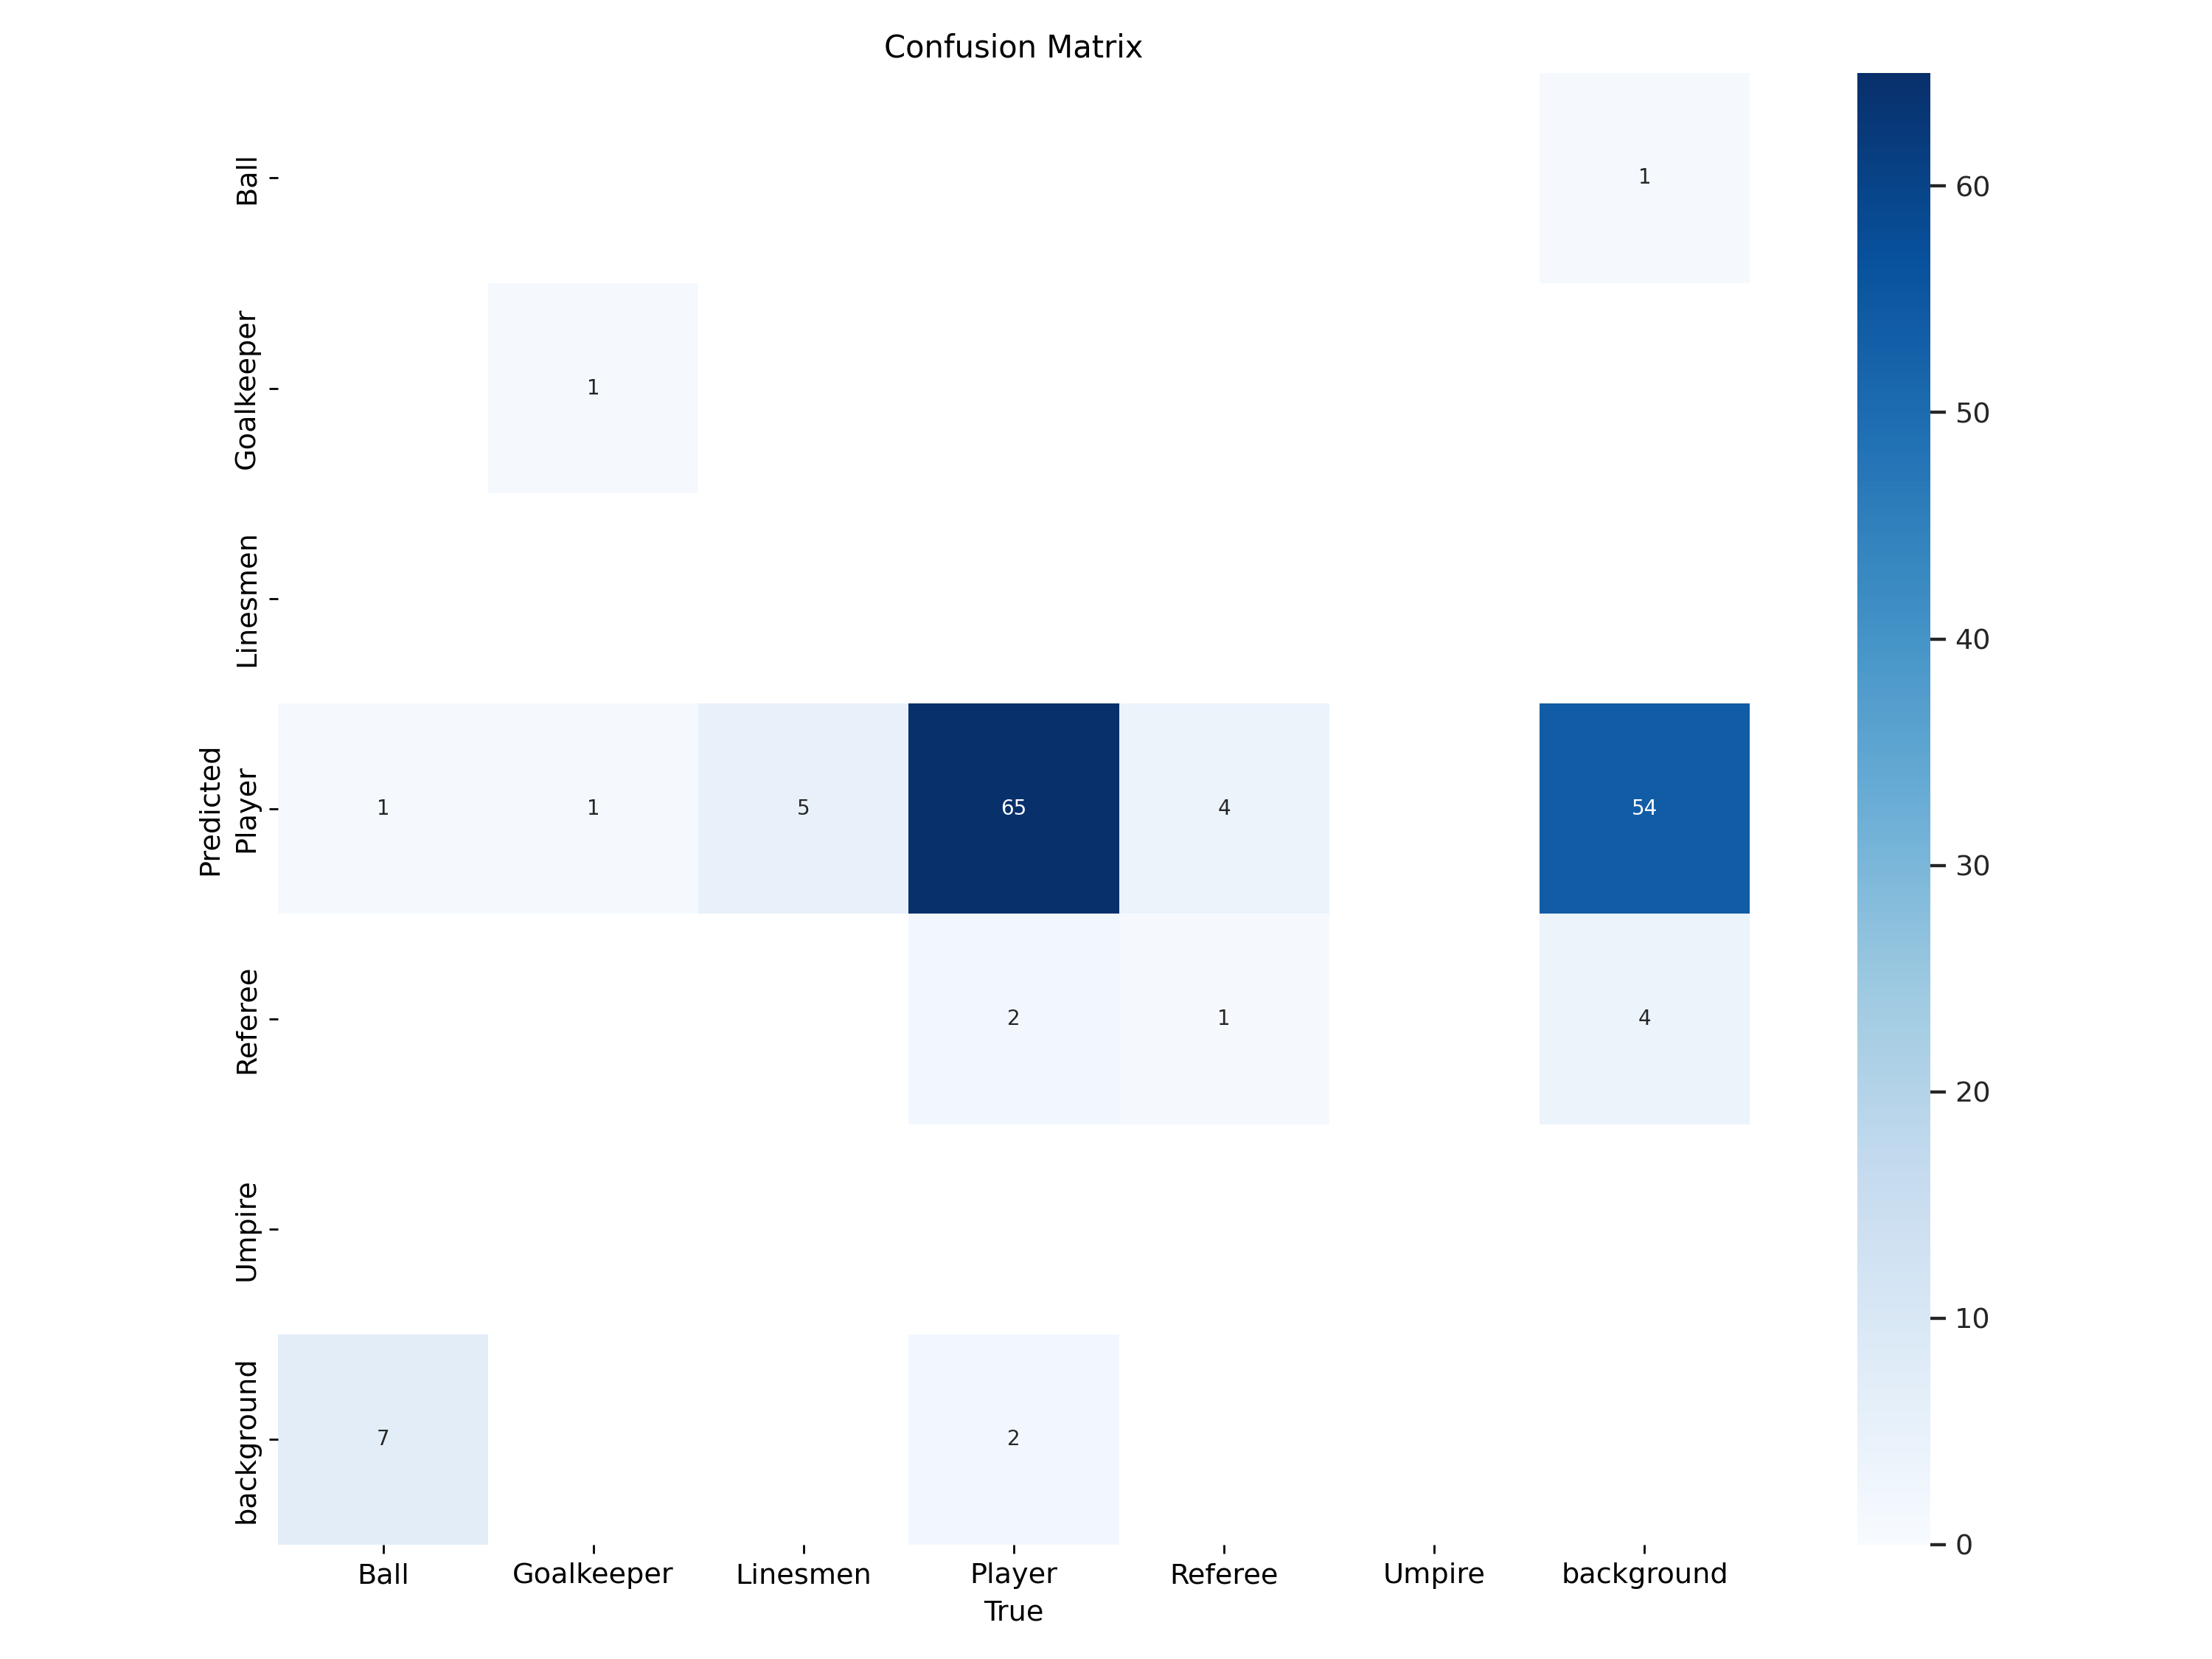

In [8]:
# Display the Confusion Matrix

from IPython.display import display, Image
Image(filename=f'runs/detect/train/confusion_matrix.png', width=600)

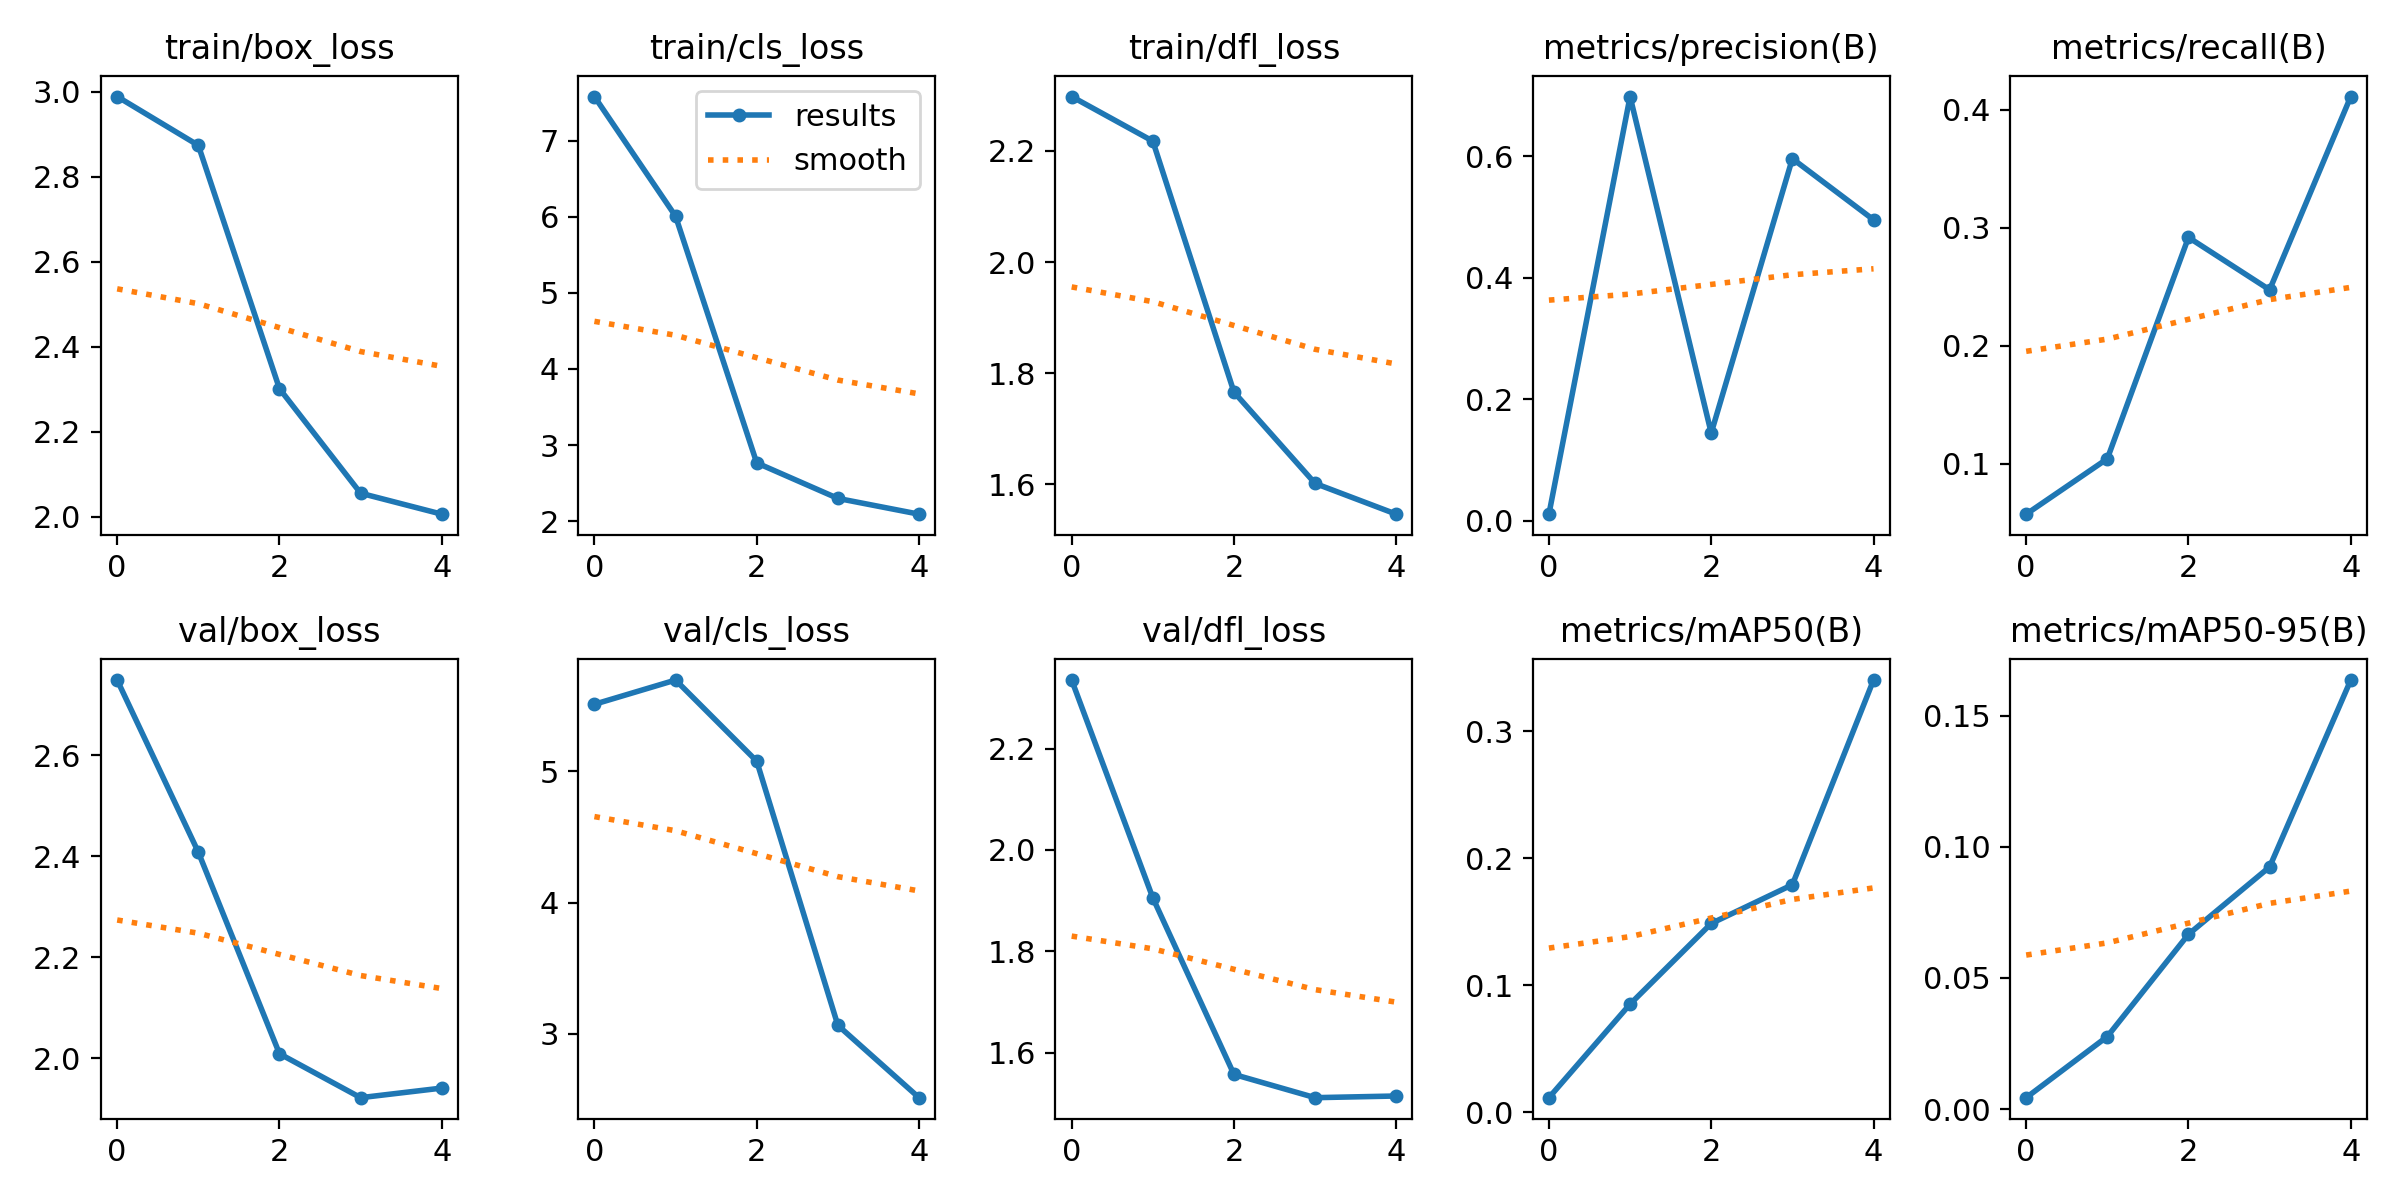

In [9]:
# Display the results

Image(filename=f'runs/detect/train/results.png', width=600)

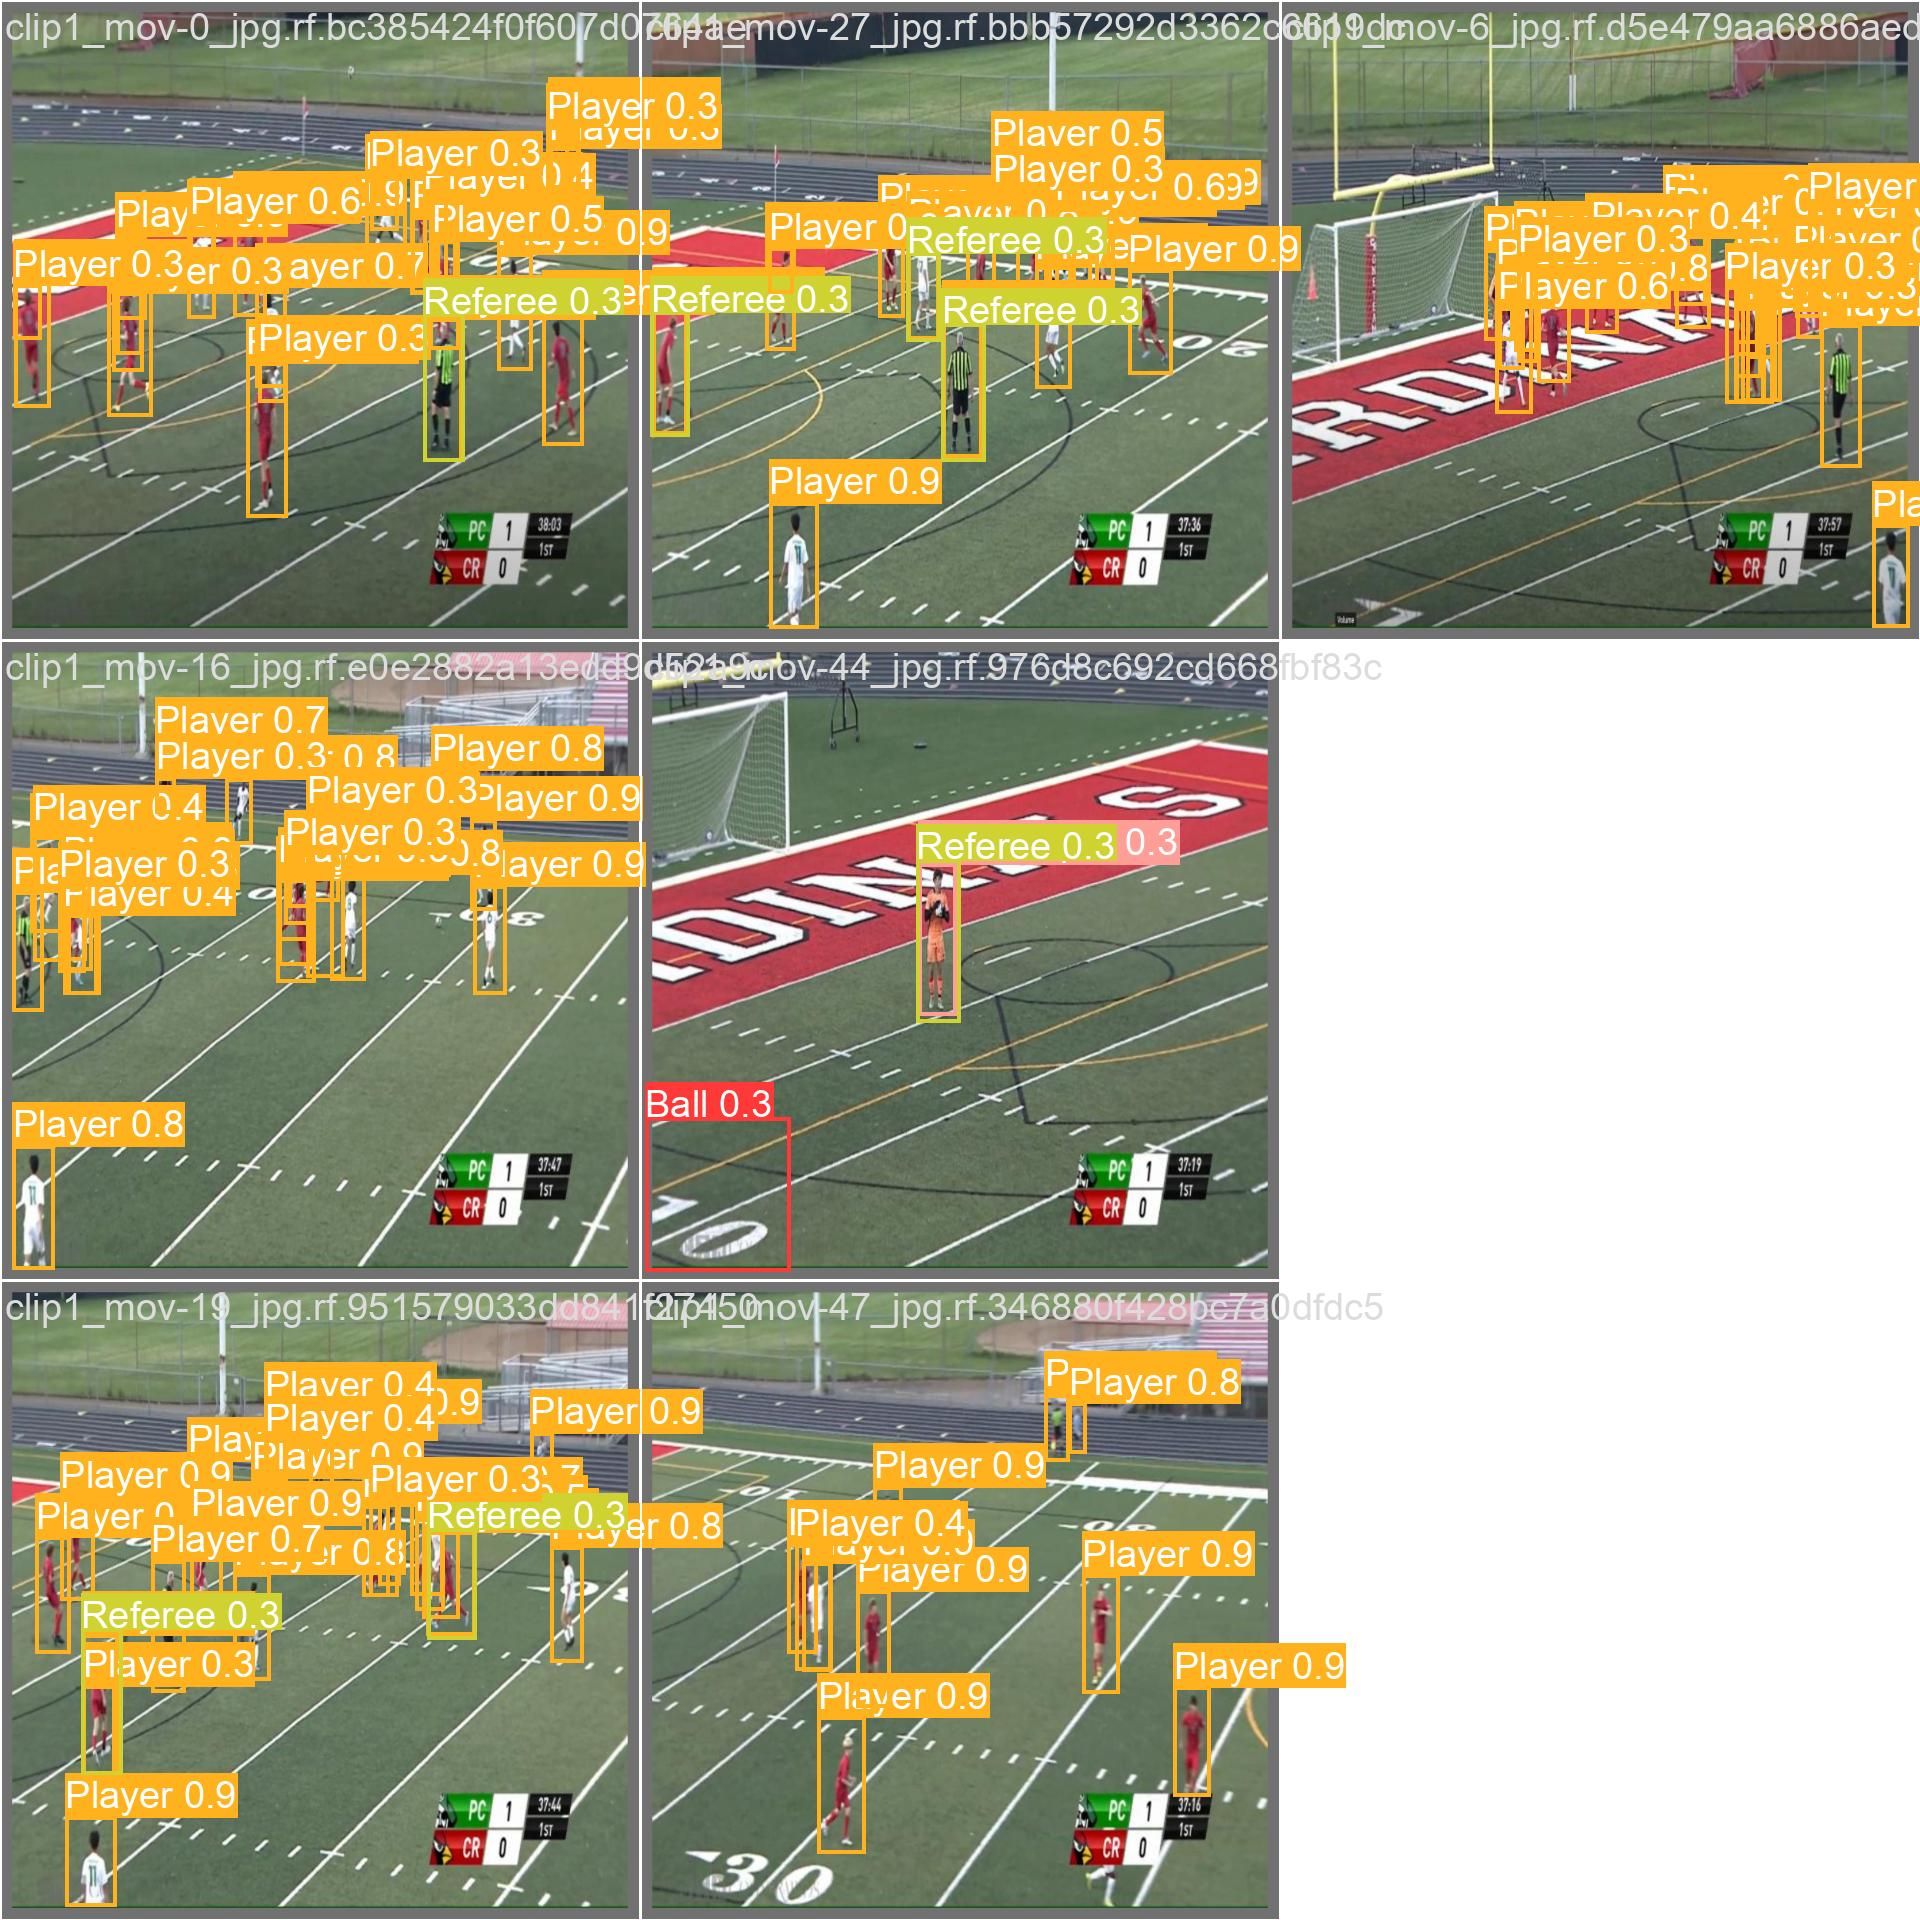

In [10]:
Image(filename=f'runs/detect/train/val_batch0_pred.jpg', width=600)

In [11]:
# Validate Model

!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients
val: Scanning /content/Sports-Vision-1/valid/labels.cache... 7 images, 0 backgrounds, 0 corrupt: 100% 7/7 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.78it/s]
                   all          7         89        0.5      0.411       0.34      0.163
                  Ball          7          8          0          0    0.00507    0.00152
            Goalkeeper          7          2      0.681        0.5      0.508      0.254
              Linesmen          7          5          1          0     0.0462     0.0231
                Player          7         69      0.505      0.957      0.852      0.354
               Referee          7          5      0.317        0.6       0.29      0.183
Speed: 0.4ms preprocess, 21.7ms inference, 0.0ms loss, 45.2ms p

In [12]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients

image 1/4 /content/Sports-Vision-1/test/images/clip1_mov-21_jpg.rf.80d8c31a472b99c5adb869649501109f.jpg: 800x800 19 Players, 1 Referee, 24.6ms
image 2/4 /content/Sports-Vision-1/test/images/clip1_mov-45_jpg.rf.083f2b483da5ba7fb2629d85a12bae8f.jpg: 800x800 2 Players, 1 Referee, 29.2ms
image 3/4 /content/Sports-Vision-1/test/images/clip1_mov-4_jpg.rf.e9aa66a373ba6c63e4fc9aac402e88a5.jpg: 800x800 20 Players, 1 Referee, 30.4ms
image 4/4 /content/Sports-Vision-1/test/images/clip1_mov-8_jpg.rf.dbbaf763b996db5f61ba1326baf5a1eb.jpg: 800x800 33 Players, 3 Referees, 24.6ms
Speed: 7.5ms preprocess, 27.2ms inference, 1.9ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict


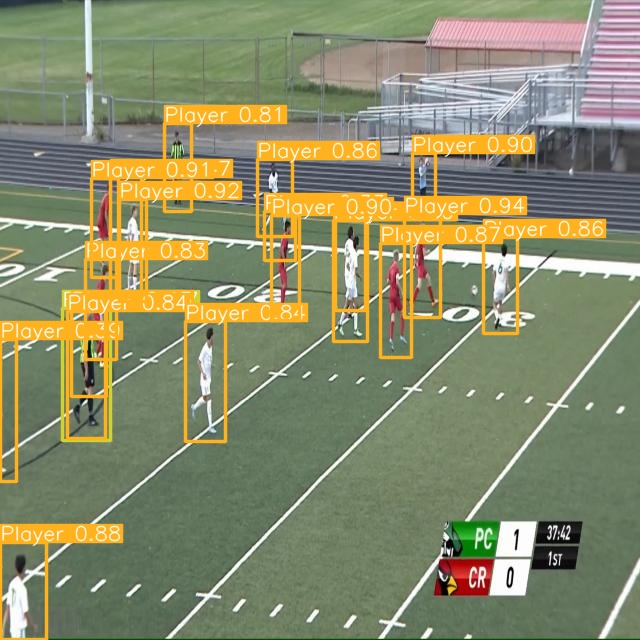

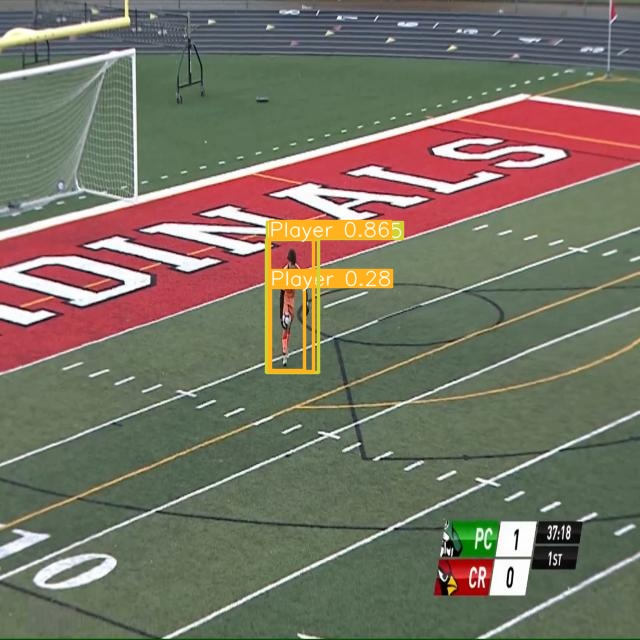

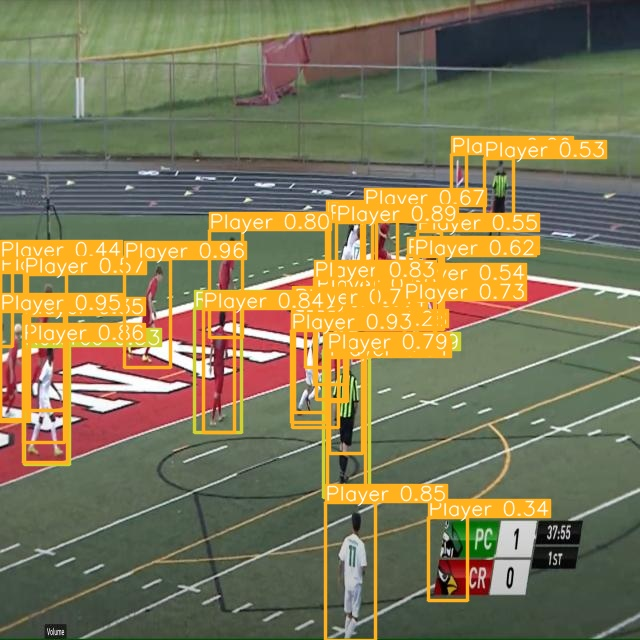

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")